In [54]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

**Data Exploration**

In [2]:
dataframe = pd.read_csv('audi.csv')
dataframe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
dataframe.shape

(10668, 9)

In [4]:
dataframe.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [5]:
dataframe.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


Through the **.info()** function we have found the categorical values that we will have to encode at a later stage

In [7]:
dataframe['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [8]:
dataframe['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [9]:
dataframe['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

<AxesSubplot:>

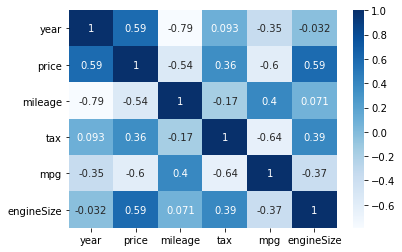

In [10]:
sns.heatmap(dataframe.corr(),cmap="Blues",annot=True)

From the heatmap we can infer that *Year*,*Price* & *Engine Size* are positively correlated i.e the older the car the lower it's resale value

In [11]:
dataframe.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

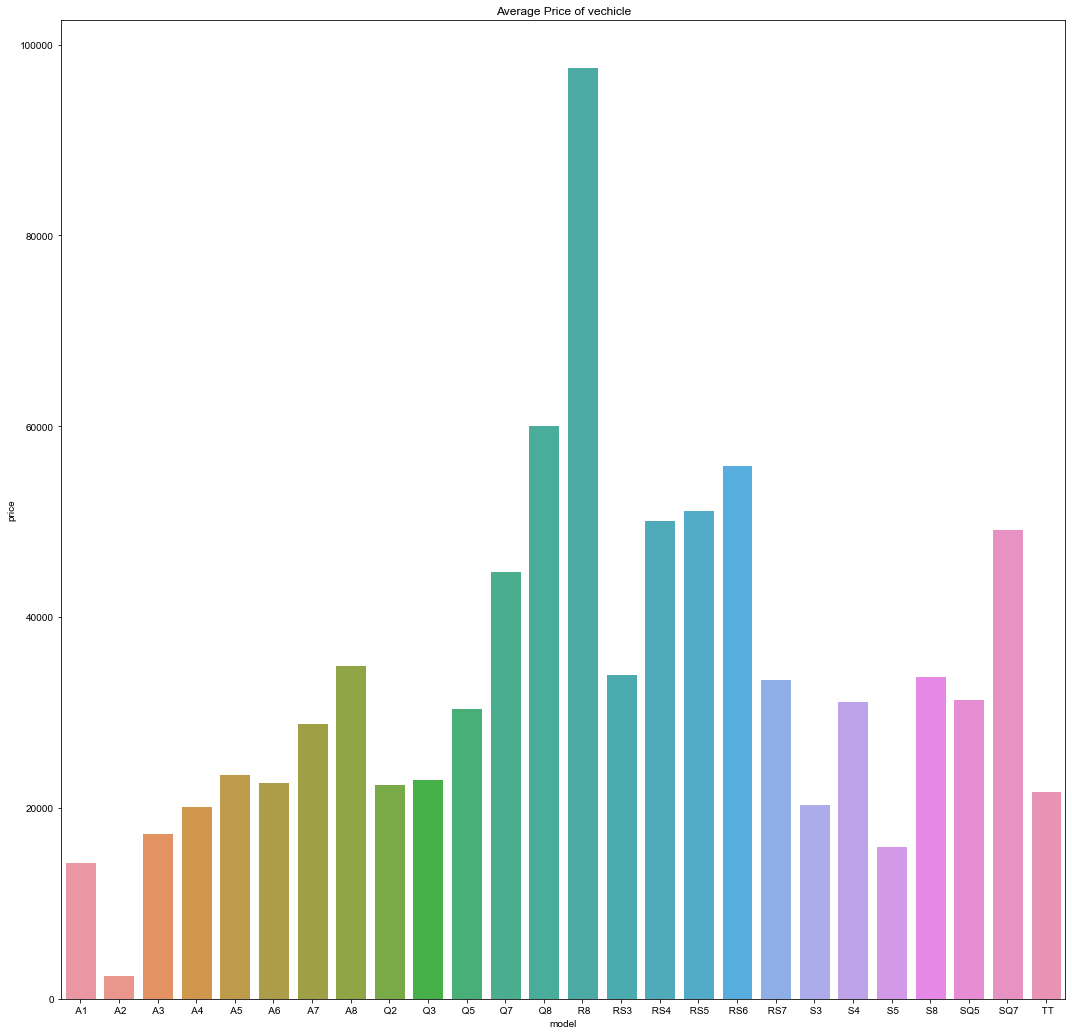

In [12]:
# Checking the price by model
plot.subplots(figsize=(18,18))
price_by_model = dataframe.groupby("model")['price'].mean().reset_index()
plot.title("Average Price of vechicle")
sns.set()
sns.barplot(x="model", y ="price", data = price_by_model)
plot.show()

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

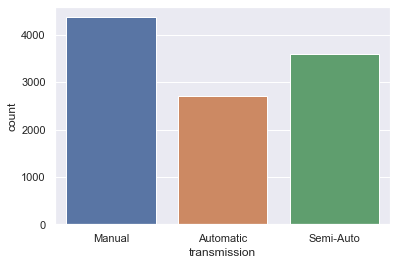

In [14]:
sns.countplot(dataframe["transmission"])

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

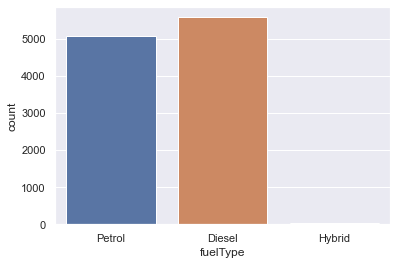

In [15]:
sns.countplot(dataframe["fuelType"])

In [16]:
dataset1= dataframe[["price", "mileage", "mpg", "tax"]]
Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1> (Q3 + 1.5 * IQR))).sum()

price       443
mileage     324
mpg          33
tax        3287
dtype: int64

In [17]:
df =pd.get_dummies(dataframe, columns=['transmission','fuelType'])

In [18]:
df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,A1,2017,12500,15735,150,55.4,1.4,0,1,0,0,0,1
1,A6,2016,16500,36203,20,64.2,2.0,1,0,0,1,0,0
2,A1,2016,11000,29946,30,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,25952,145,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,1998,145,49.6,1.0,0,1,0,0,0,1


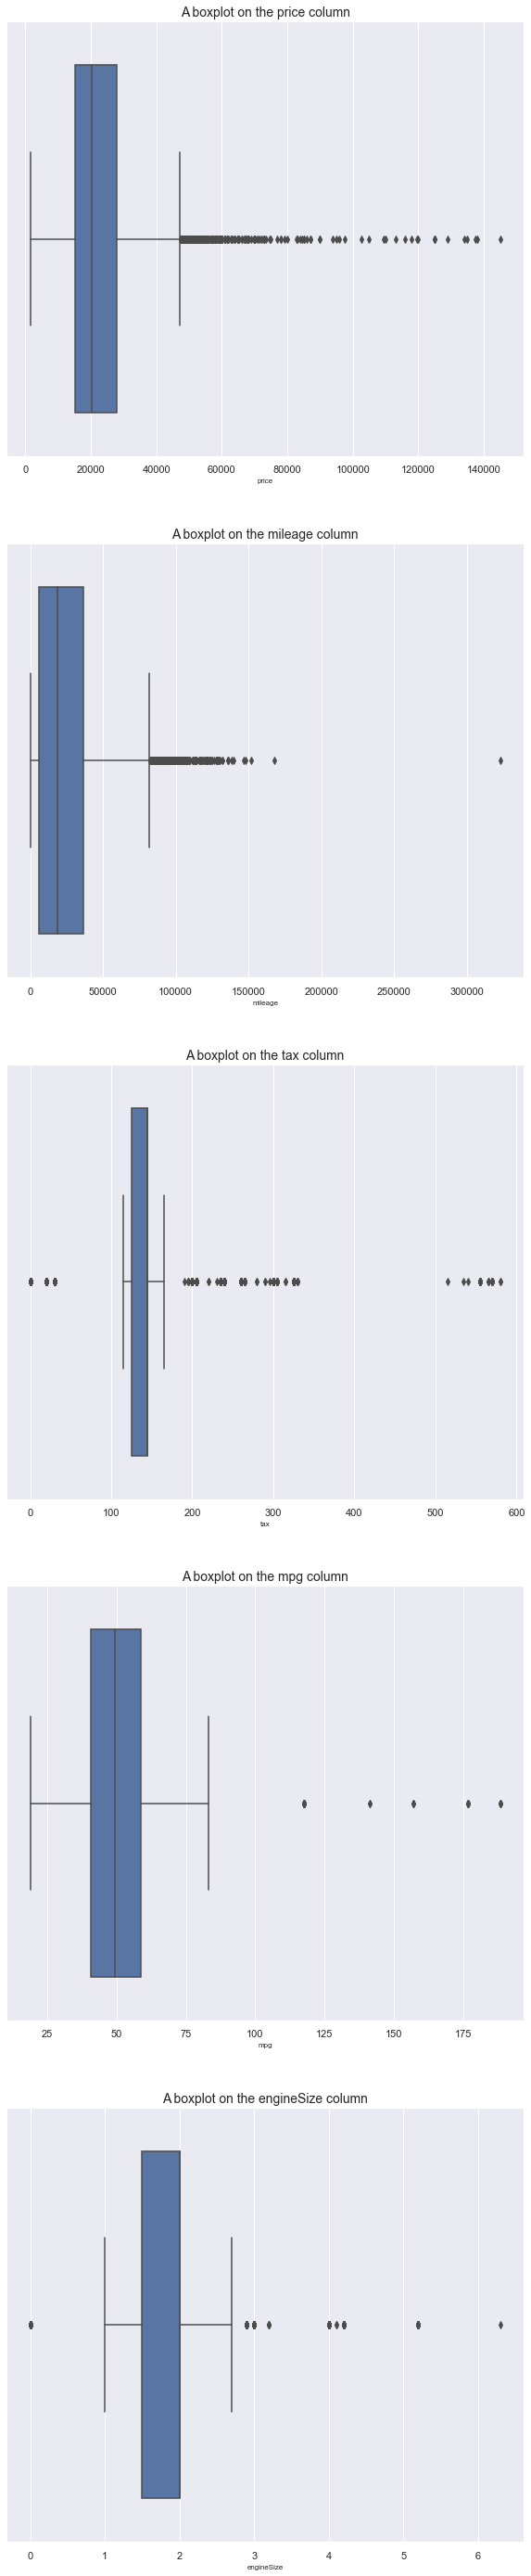

In [19]:
#outliers boxplot
col_names = ["price", "mileage", "tax", "mpg", "engineSize"]
fig, ax = plot.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plot.show()

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()

<ipython-input-20-0fbe00ed1e73>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()
<ipython-input-20-0fbe00ed1e73>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()


engineSize                1465
fuelType_Diesel              0
fuelType_Hybrid             28
fuelType_Petrol              0
mileage                    324
model                        0
mpg                         33
price                      443
tax                       3287
transmission_Automatic       0
transmission_Manual          0
transmission_Semi-Auto       0
year                       170
dtype: int64

Since Tax seems to have a lot of outliers we will drop tax

In [21]:
df= df.drop(['tax'],axis=1)

In [22]:
df.head()

,model,year,price,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,A1,2017,12500,15735,55.4,1.4,0,1,0,0,0,1
1,A6,2016,16500,36203,64.2,2.0,1,0,0,1,0,0
2,A1,2016,11000,29946,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,25952,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,1998,49.6,1.0,0,1,0,0,0,1


In [23]:
df.columns

Index(['model', 'year', 'price', 'mileage', 'mpg', 'engineSize',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [24]:
df=df.drop(['model'],axis=1)

To see if feature scaling improves the accuracy of our model or not we will try running the algorithms without a feature scaler once and once with StandardScaler and once with MinMax

In [25]:
from sklearn.preprocessing import MinMaxScaler

Minmaxdf= MinMaxScaler().fit_transform(df)


In [26]:
Minmaxdf=pd.DataFrame(Minmaxdf, columns = df.columns)

In [27]:
from sklearn.preprocessing import StandardScaler

Stdscalerdf  = StandardScaler().fit_transform(df)


In [28]:
Stdscalerdf=pd.DataFrame(Stdscalerdf, columns = df.columns)

In [29]:
X= df.drop(['price'],axis=1)
Y = df['price']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

MinMax Scaler

In [31]:
X_mtrain,X_mtest,Y_mtrain,Y_mtest = train_test_split(Minmaxdf.drop(columns = ['price']),Minmaxdf[['price']],train_size = 0.7, random_state = 0)

Standard Scaler

In [32]:
X_strain,X_stest,Y_strain,Y_stest = train_test_split(Stdscalerdf.drop(columns = ['price']),Stdscalerdf[['price']],train_size=0.7,random_state=100)

In [33]:
X_train.head()

,year,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
5936,2017,33200,55.4,2.0,0,0,1,1,0,0
7512,2018,14500,54.3,1.4,0,1,0,0,0,1
10440,2015,45669,60.1,1.4,1,0,0,0,0,1
9487,2020,94,40.4,2.0,1,0,0,0,0,1
9456,2017,11570,55.4,1.4,0,1,0,0,0,1


In [34]:
Y_train.head()

5936     22500
7512     17444
10440    13000
9487     27995
9456     12990
Name: price, dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet


Linear Regression

In [36]:
linreg = LinearRegression().fit(X_train,Y_train)
accuracy = linreg.score(X_test,Y_test)*100
accuracy

77.55612360161552

In [37]:
linreg = LinearRegression().fit(X_mtrain,Y_mtrain)
accuracy = linreg.score(X_mtest,Y_mtest)*100
accuracy

80.4044743498372

In [38]:
linreg = LinearRegression().fit(X_strain,Y_strain)
accuracy = linreg.score(X_stest,Y_stest)*100
accuracy

77.5572986804221

Elastic Net

In [39]:
elnet = ElasticNet(random_state=0).fit(X_train,Y_train)
accuracy = elnet.score(X_test,Y_test)*100
accuracy

66.80482263866342

In [40]:
elnet = ElasticNet(random_state=0).fit(X_mtrain,Y_mtrain)
accuracy = elnet.score(X_mtest,Y_mtest)*100
accuracy

-0.005964147248893603

In [41]:
elnet = ElasticNet(random_state=0).fit(X_mtrain,Y_mtrain)
accuracy = elnet.score(X_stest,Y_stest)*100
accuracy

-3.0770563030254605

Ridge Regression

In [42]:
rid =Ridge(alpha=1.0).fit(X_train,Y_train)
accuracy = rid.score(X_test,Y_test)*100
accuracy

77.55206699823644

In [43]:
rid =Ridge(alpha=1.0).fit(X_mtrain,Y_mtrain)
accuracy = rid.score(X_mtest,Y_mtest)*100
accuracy

80.42153594176949

In [44]:
rid =Ridge(alpha=1.0).fit(X_strain,Y_strain)
accuracy = rid.score(X_stest,Y_stest)*100
accuracy

77.55565792887217

Lasso Regression

In [45]:
lass=Lasso(alpha=0.1).fit(X_train,Y_train)
accuracy = lass.score(X_test,Y_test)*100
accuracy

77.55613525207518

In [46]:
lass=Lasso(alpha=0.1).fit(X_mtrain,Y_mtrain)
accuracy = lass.score(X_mtest,Y_mtest)*100
accuracy

-0.005964147248893603

In [47]:
lass=Lasso(alpha=0.1).fit(X_strain,Y_strain)
accuracy = lass.score(X_stest,Y_stest)*100
accuracy

73.72254558952748

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
accuracy = rf_reg.score(X_test,Y_test)*100
accuracy

94.80685363517226

In [49]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_mtrain, Y_mtrain)
accuracy = rf_reg.score(X_mtest,Y_mtest)*100
accuracy

<ipython-input-49-cf7aa30ccd4b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_mtrain, Y_mtrain)


94.14053835656794

In [50]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_strain, Y_strain)
accuracy = rf_reg.score(X_stest,Y_stest)*100
accuracy

<ipython-input-50-13a1d87057eb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_strain, Y_strain)


94.84357354739193

MLP regressor without Feature Scaling

In [51]:
from sklearn.neural_network import MLPRegressor
mlp =MLPRegressor(random_state=0)
mlp.fit(X_train, Y_train)
accuracy = mlp.score(X_test,Y_test)*100
accuracy

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


47.392040663973404

MLP regressor with MinMax Scaling

In [52]:
mlp.fit(X_mtrain, Y_mtrain)
accuracy = mlp.score(X_mtest,Y_mtest)*100
accuracy

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


88.68722997123332

MLP regressor with Standard Scaling

In [53]:
mlp.fit(X_strain, Y_strain)
accuracy = mlp.score(X_stest,Y_stest)*100
accuracy

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


92.97428094262845

In [56]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    y_pred=KNN.predict(X_test)
    a=r2_score(Y_test, y_pred)*100
    print("K =",i," , R2 Score =",a)

K = 1  , R2 Score = 32.50600317641117
K = 2  , R2 Score = 43.20222239099431
K = 3  , R2 Score = 45.51605947381808
K = 4  , R2 Score = 44.92351277307053
K = 5  , R2 Score = 44.23925329482506
K = 6  , R2 Score = 44.01173887637634
K = 7  , R2 Score = 43.198021463822386
K = 8  , R2 Score = 42.477088546180795
K = 9  , R2 Score = 42.7442262712518


In [57]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_strain,Y_strain)
    y_pred=KNN.predict(X_stest)
    a=r2_score(Y_stest, y_pred)*100
    print("K =",i," , R2 Score =",a)

K = 1  , R2 Score = 90.66042637000311
K = 2  , R2 Score = 91.71882103908811
K = 3  , R2 Score = 91.99887305122972
K = 4  , R2 Score = 91.74940284029586
K = 5  , R2 Score = 91.42235530359228
K = 6  , R2 Score = 91.2263075567852
K = 7  , R2 Score = 91.03262103769492
K = 8  , R2 Score = 90.58724223585892
K = 9  , R2 Score = 90.31535266979083


In [59]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,15):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_mtrain,Y_mtrain)
    y_pred=KNN.predict(X_mtest)
    a=r2_score(Y_mtest, y_pred)*100
    print("K =",i," , R2 Score =",a)

K = 1  , R2 Score = 90.12964241874612
K = 2  , R2 Score = 91.96275367016358
K = 3  , R2 Score = 92.22086417235971
K = 4  , R2 Score = 92.21752404918242
K = 5  , R2 Score = 91.81720456031486
K = 6  , R2 Score = 91.89204332014921
K = 7  , R2 Score = 91.74183793158502
K = 8  , R2 Score = 92.2011352212597
K = 9  , R2 Score = 92.1401715483086
K = 10  , R2 Score = 91.94363041989328
K = 11  , R2 Score = 91.8412644014037
K = 12  , R2 Score = 91.74752246004472
K = 13  , R2 Score = 91.5564186001574
K = 14  , R2 Score = 91.40641385565625


In [60]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,Y_train)
y_pred=baggReg.predict(X_test)
r2_score(Y_test, y_pred)*100

92.45879038069597

In [61]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_mtrain,Y_mtrain)
y_pred=baggReg.predict(X_mtest)
r2_score(Y_mtest, y_pred)*100

90.29706723907516

In [62]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_strain,Y_strain)
y_pred=baggReg.predict(X_stest)
r2_score(Y_stest, y_pred)*100

92.24255760474792

In [65]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, Y_train)
y_pred = ABR.predict(X_test)
r2_score(Y_test, y_pred)*100

93.51910479091772

In [64]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_mtrain, Y_mtrain)
y_pred = ABR.predict(X_mtest)
r2_score(Y_mtest, y_pred)*100

92.36587759283952

In [66]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_strain, Y_strain)
y_pred = ABR.predict(X_mtest)
r2_score(Y_stest, y_pred)*100

-2.551110127479106

In [68]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,Y_train)
y_pred = xg_reg.predict(X_test)
r2_score(Y_test, y_pred)*100

93.89135965176659

In [69]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_mtrain,Y_mtrain)
y_pred = xg_reg.predict(X_mtest)
r2_score(Y_mtest, y_pred)*100

89.94048969709196

In [70]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_strain,Y_strain)
y_pred = xg_reg.predict(X_stest)
r2_score(Y_stest, y_pred)*100

93.66355363868446